<a href="https://www.kaggle.com/code/samithsachidanandan/time-series-forecasting-in-python-analysis?scriptVersionId=232025680" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing the necessary libraries 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")


from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression 


## Loading the Data

In [2]:
df = pd.read_csv('/kaggle/input/forecasting-time-series/gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


## Data Cleaning 

In [3]:
df.shape

(847, 2)

In [4]:
print(f"Date range of gold proces available from -  {df['Date'].iloc[0]} to {df['Date'].iloc[len(df)-1]} ")

Date range of gold proces available from -  1950-01 to 2020-07 


In [5]:
date = pd.date_range(start = '1/1/1950' , end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='ME')

In [6]:
df['month'] =date
df.drop('Date', axis =1, inplace =True)
df =df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


# Exploratory Data Analysis

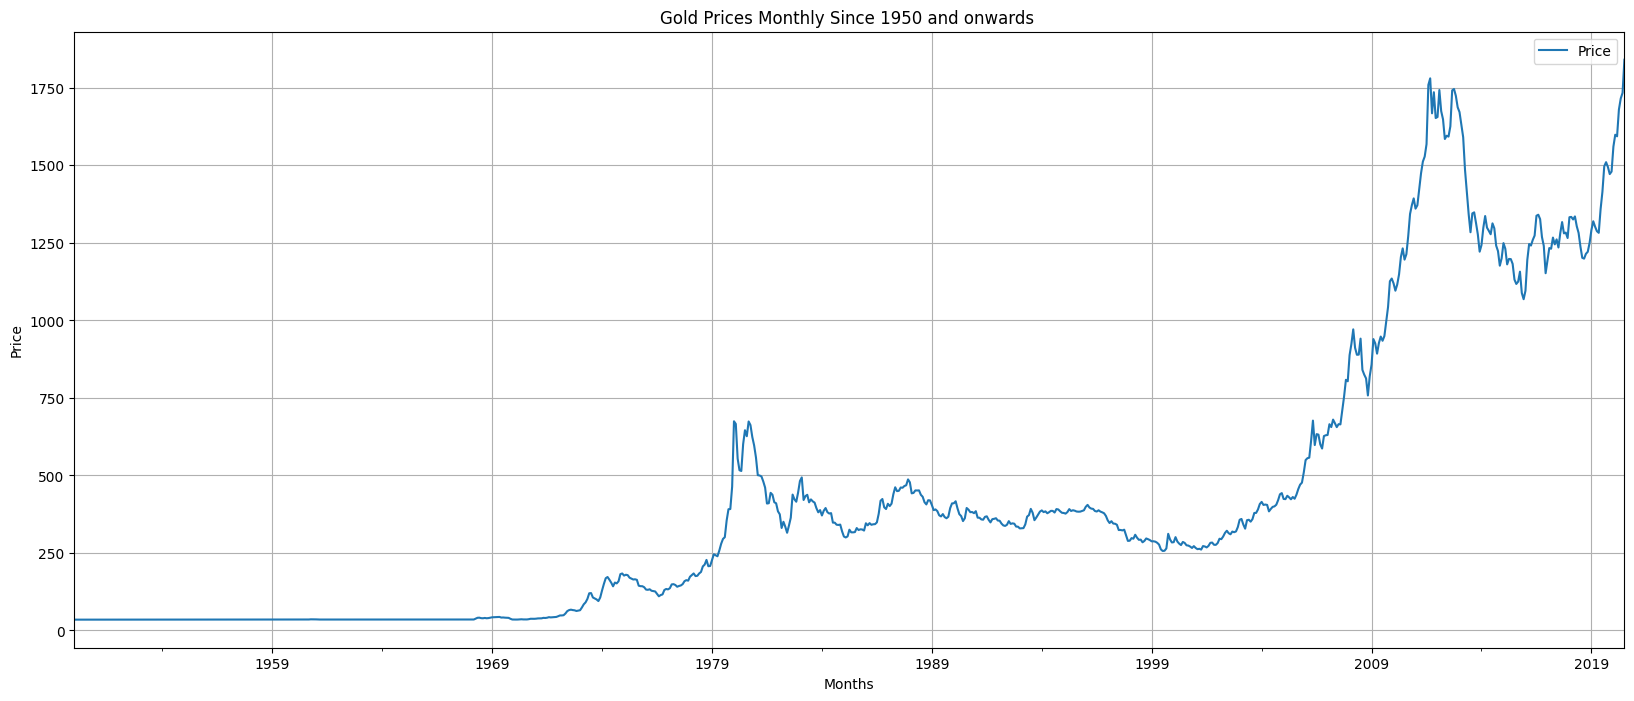

In [7]:
df.plot(figsize=(20,8))
plt.title('Gold Prices Monthly Since 1950 and onwards ')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid();

In [8]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


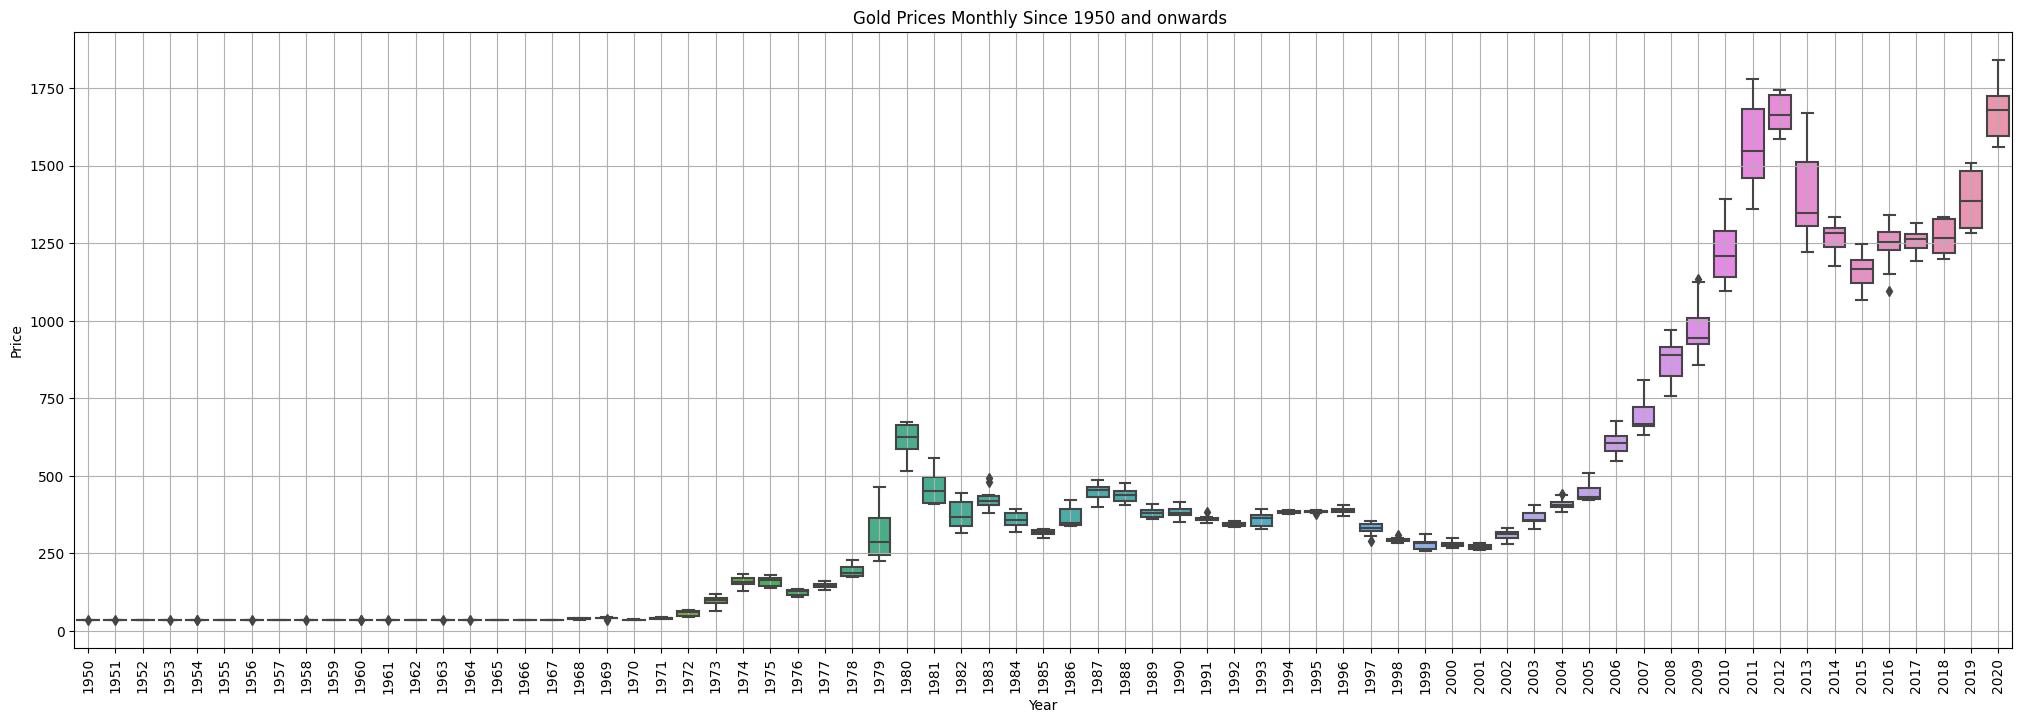

In [9]:
_, ax = plt.subplots(figsize=(25,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax=ax)

plt.title('Gold Prices Monthly Since 1950 and onwards ')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.grid();

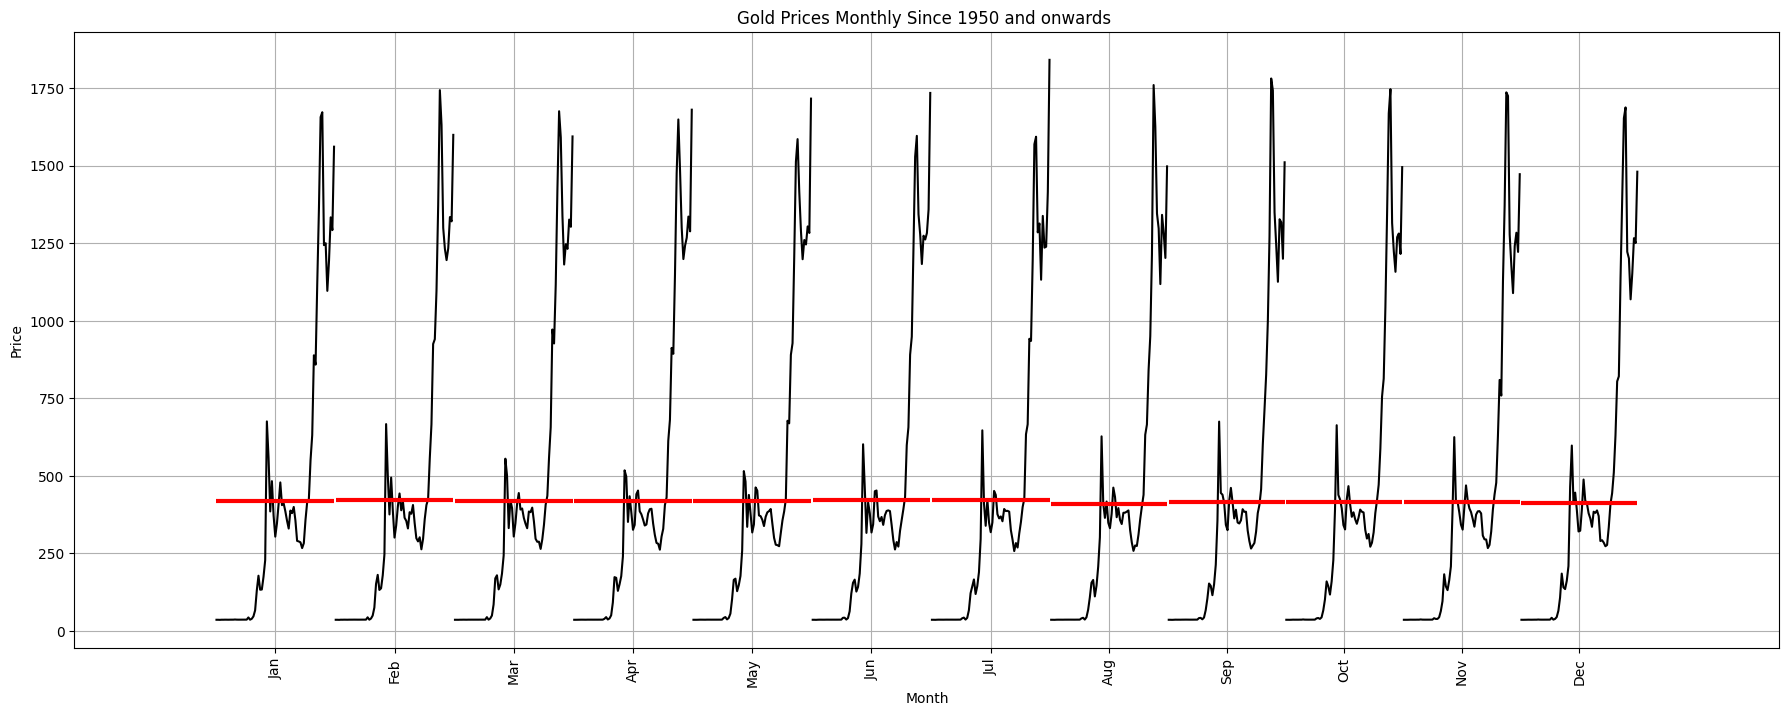

In [10]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax =plt.subplots(figsize=(22,8))
month_plot(df, ylabel = 'gold price', ax= ax)
plt.title('Gold Prices Monthly Since 1950 and onwards ')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.grid();

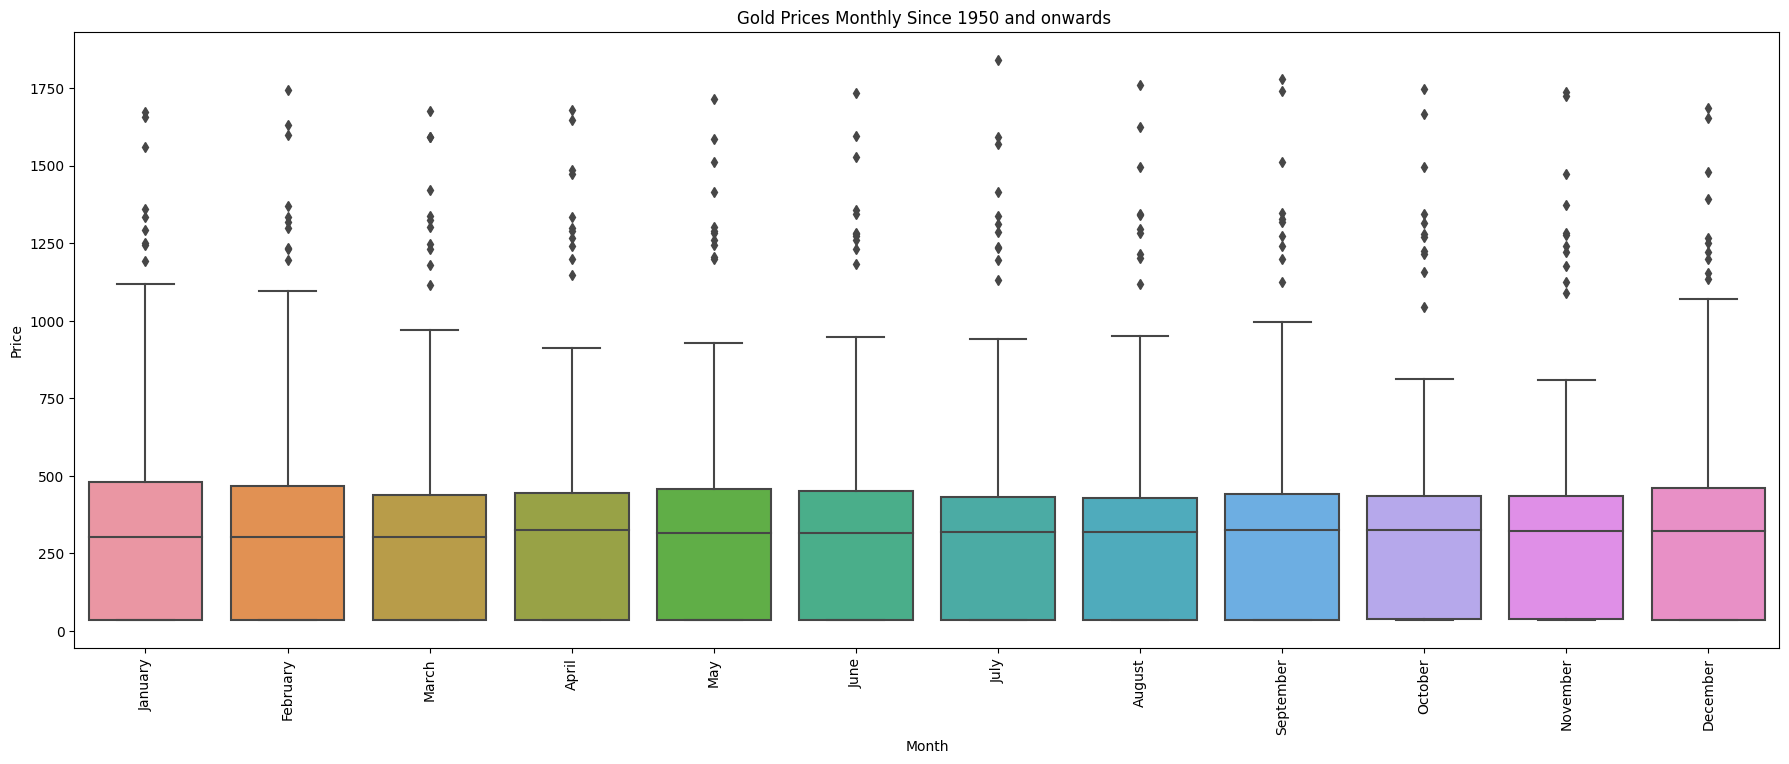

In [11]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax=ax)

plt.title('Gold Prices Monthly Since 1950 and onwards ')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(rotation = 90)
plt.show()

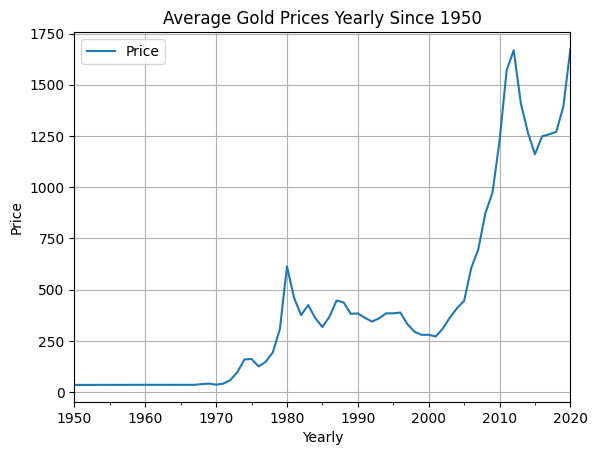

In [12]:
df_yearly_sum =df.resample('A').mean()
df_yearly_sum.plot();
plt.title('Average Gold Prices Yearly Since 1950')
plt.xlabel('Yearly')
plt.ylabel('Price')

plt.grid()

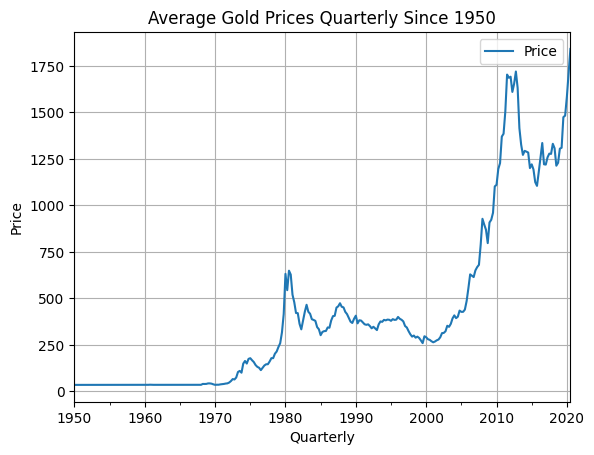

In [13]:
df_quarterly_sum =df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title('Average Gold Prices Quarterly Since 1950')
plt.xlabel('Quarterly')
plt.ylabel('Price')

plt.grid()

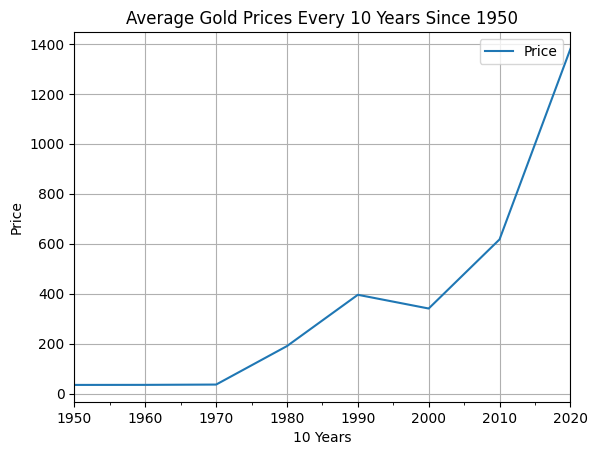

In [14]:
df_decade_sum =df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('Average Gold Prices Every 10 Years Since 1950')
plt.xlabel('10 Years')
plt.ylabel('Price')

plt.grid()

In [15]:
df1 = df.groupby(df.index.year).mean().rename(columns = {'Price':'Mean'})
df1 =df1.merge(df.groupby(df.index.year).std().rename(columns={'Price' : 'Std'}), left_index = True, right_index = True )
df1['Cov_pct'] = ((df1['Std']/df1["Mean"])*100).round(2)
df1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


[]

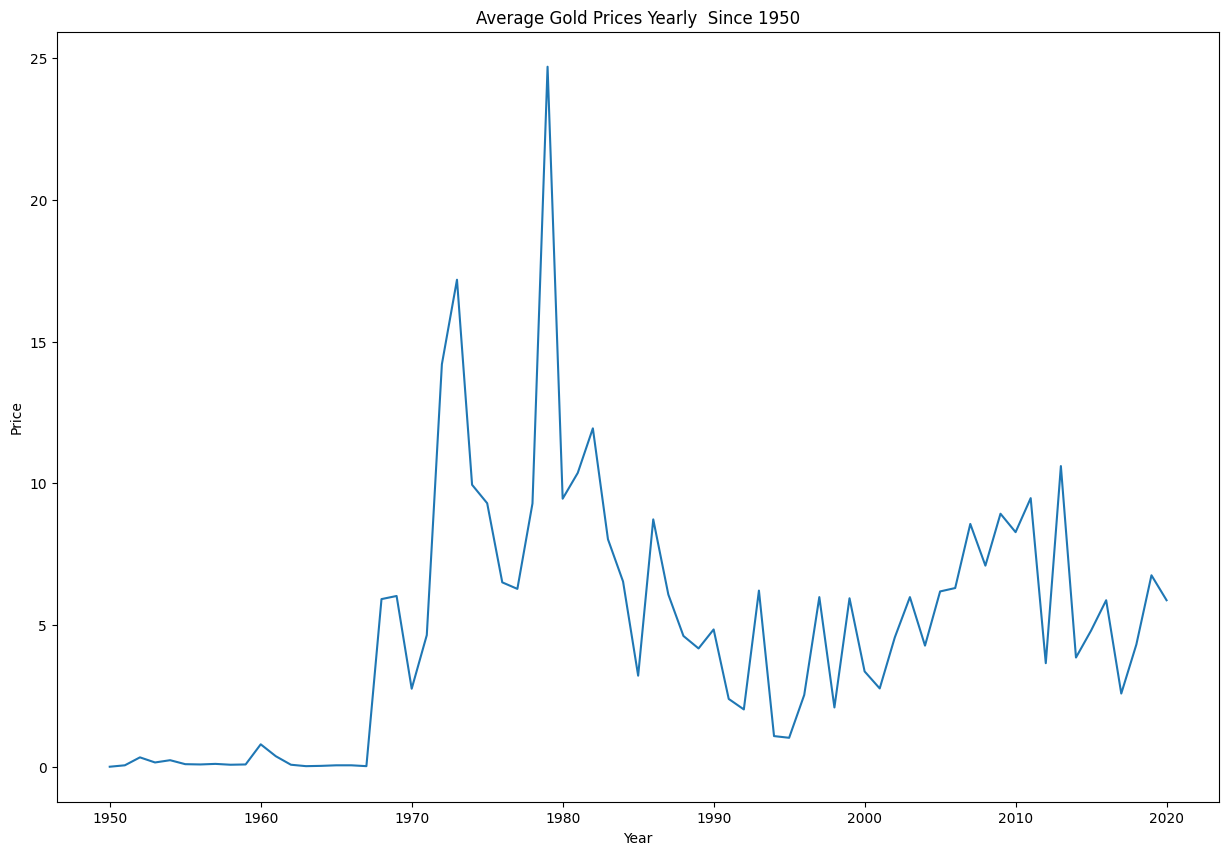

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
df1['Cov_pct'].plot();
plt.title('Average Gold Prices Yearly  Since 1950')
plt.xlabel('Year')
plt.ylabel('Price')

plt.plot()

## Model Training 

In [17]:
train = df[df.index.year <= 2014]
test = df[df.index.year > 2014]

In [18]:
print(train.shape)
print(test.shape)

(780, 1)
(67, 1)


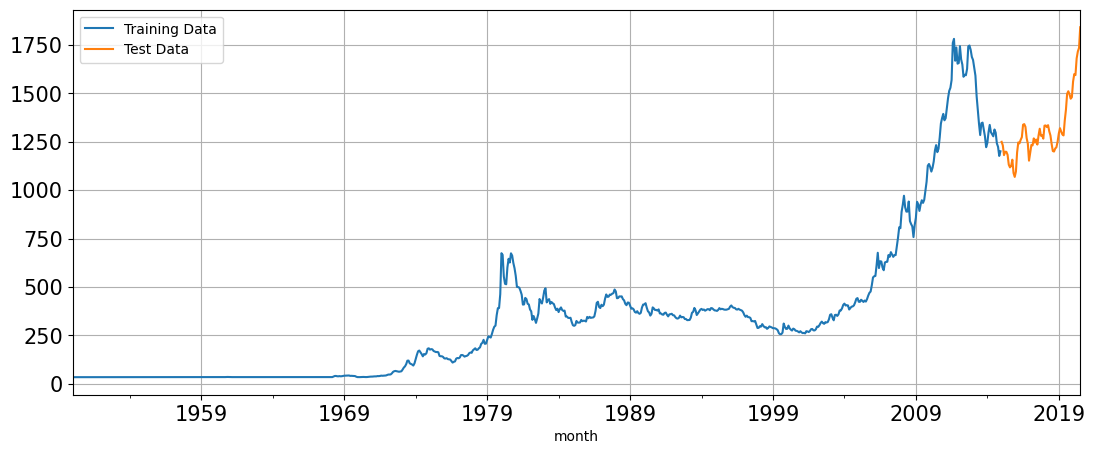

In [19]:
train["Price"].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(["Training Data", "Test Data"])
plt.show()

In [20]:
# Linear Regression 
train_time = [i+1 for i in range (len(train))]
test_time = [i + len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(780, 67)

In [21]:
LR_train = train.copy()
LR_test = test.copy()

In [22]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [23]:
lr = LinearRegression()
lr.fit( LR_train[['time']],LR_train['Price'].values)

LinearRegression()

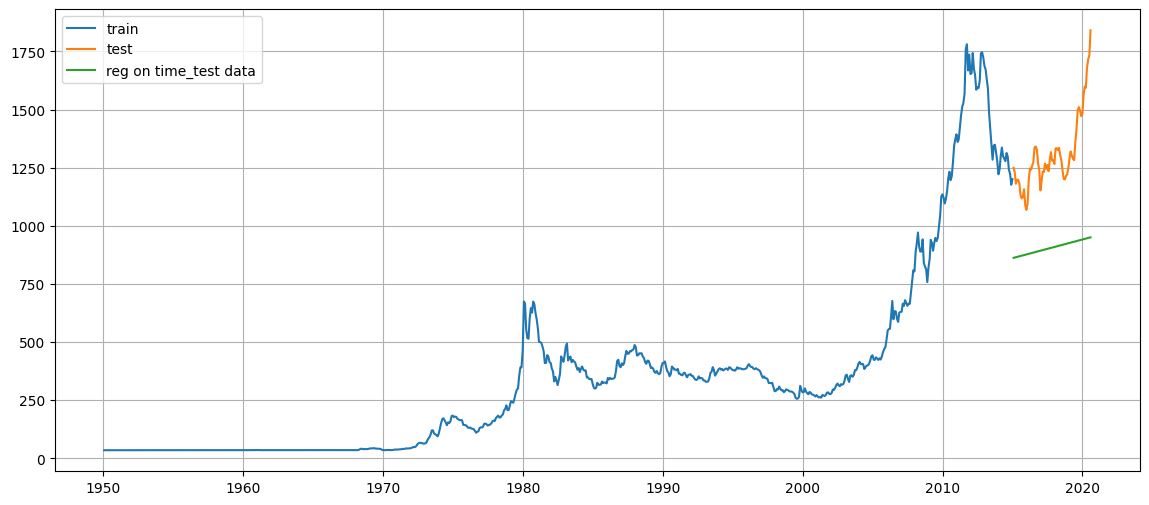

In [24]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize=(14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test["Price"], label = 'test')
plt.plot(LR_test['forecast'], label ='reg on time_test data')

plt.legend(loc = 'best')
plt.grid()

In [25]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/actual))*100,2)

In [26]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("MAPE is %3.3f"  %(mape_model1_test), "%")

MAPE is 30.020 %


In [27]:
results = pd.DataFrame ({'Test Mape % ' : [mape_model1_test]}, index=["RegressionOnTime"])
results

,Test Mape %
RegressionOnTime,30.02


## Naive Bayes

In [28]:
Naive_train = train.copy()
Naive_test = test.copy()

In [29]:
Naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
Naive_test['naive'].head()

month
2015-01-31    1200.44
2015-02-28    1200.44
2015-03-31    1200.44
2015-04-30    1200.44
2015-05-31    1200.44
Name: naive, dtype: float64

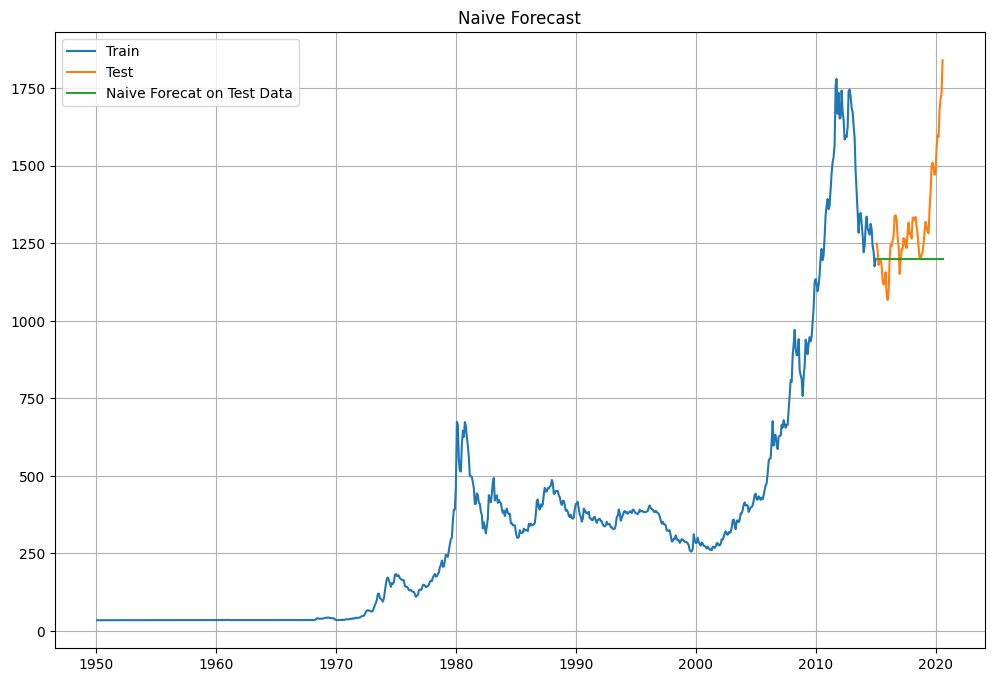

In [30]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train['Price'], label='Train')
plt.plot(test['Price'], label ='Test')
plt.plot(Naive_test['naive'], label='Naive Forecat on Test Data')

plt.legend(loc = 'best')
plt.title('Naive Forecast')
plt.grid()

In [31]:
mape_model2_test = mape(test['Price'].values, Naive_test['naive'].values)
print("For Naive Forecast on the Test Data, MAPE is %3.3f"  %(mape_model2_test), "%")

For Naive Forecast on the Test Data, MAPE is 9.020 %


In [32]:
results2 = pd.DataFrame ({'Test Mape % ' : [mape_model2_test]}, index=["NaiveModel"])
results2

,Test Mape %
NaiveModel,9.02


In [33]:
results = pd.concat([results, results2])
results

,Test Mape %
RegressionOnTime,30.02
NaiveModel,9.02


In [34]:
final_model = ExponentialSmoothing(df, trend ='additive', seasonal = 'additive').fit(smoothing_level = 0.4,
                                                                                   smoothing_trend =0.3, 
                                                                                    smoothing_seasonal =0.6         
                                                    )

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [35]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE",Mape_final_model )

MAPE 17.24


In [36]:
prediction = final_model.forecast(steps=len(test))

In [37]:
pred_df =pd.DataFrame({'lower_CI': prediction - 1.96*np.std(final_model.resid,ddof=1),
                      'prediction' : prediction,
                       'upper_CI' : prediction + 1.96 * np.std(final_model.resid,ddof=1)
                      
                      
                      
                      })
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.719706,1792.870678,1901.021651
2020-09-30,1615.305121,1723.456093,1831.607066
2020-10-31,1538.566274,1646.717246,1754.868219
2020-11-30,1476.756255,1584.907227,1693.058200
2020-12-31,1459.324336,1567.475308,1675.626280


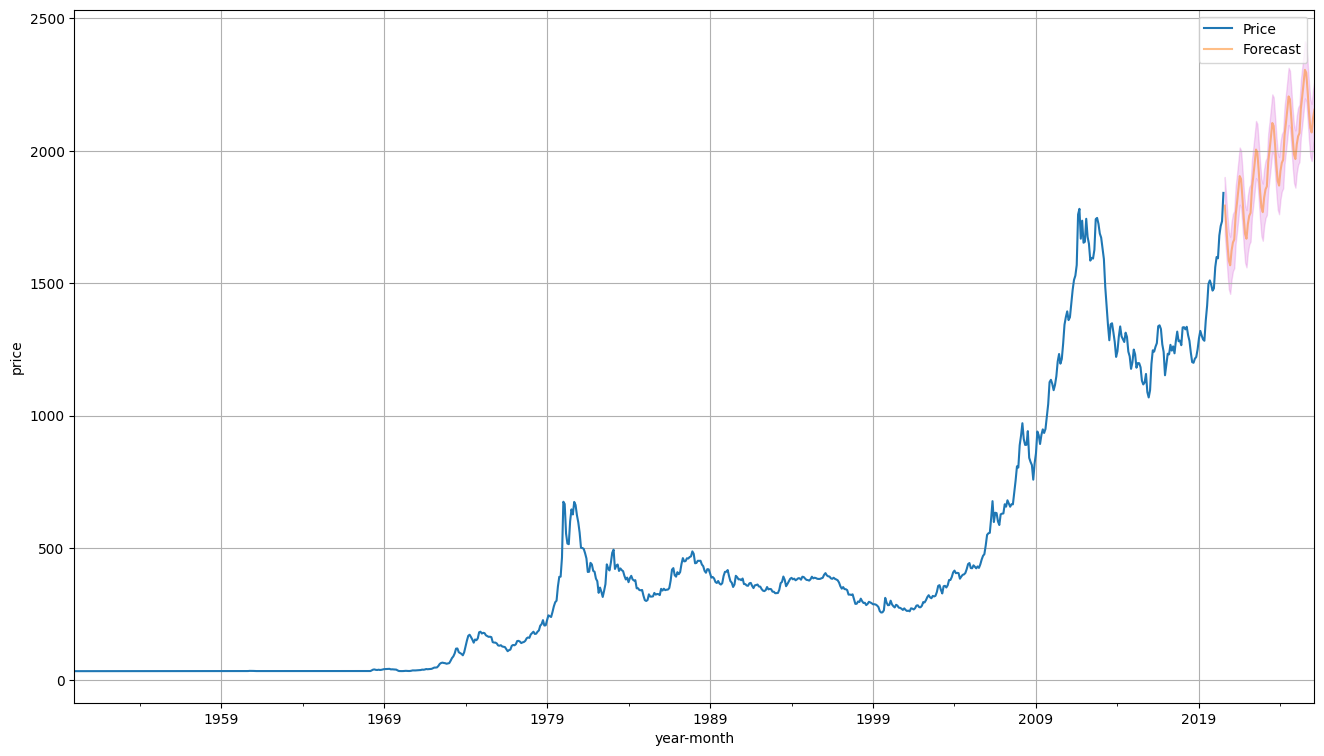

In [38]:
axis = df.plot(label = 'Actual', figsize=(16,9))
pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha = .15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()